In [4]:
pip install ydata-profiling

  Obtaining dependency information for ydata-profiling from https://files.pythonhosted.org/packages/5a/14/a19d2266adf443d441be74d65e4ac12ba252c806ccf7ffdb59c7443bd846/ydata_profiling-4.6.1-py2.py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 1.8 MB/s eta 0:00:0000:01
  Obtaining dependency information for typeguard<5,>=4.1.2 from https://files.pythonhosted.org/packages/18/01/5fc45558268ced46d86292763477996a3cdd505567cd590a688e8cdc386e/typeguard-4.1.5-py3-none-any.whl.metadata
  Obtaining dependency information for wordcloud>=1.9.1 from https://files.pythonhosted.org/packages/fb/c8/9790df08b2685bf931e940fdf1207b39f394dc28b033c603f04d7e8da0cf/wordcloud-1.9.2-cp311-cp311-macosx_10_9_x86_64.whl.metadata
  Obtaining dependency information for dacite>=1.8 from https://files.pythonhosted.org/packages/21/0f/cf0943f4f55f0fbc7c6bd60caf1343061dff818b02af5a0d444e473bb78d/dacite-1.8.1-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.5/35

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.8/159.8 kB 5.6 MB/s eta 0:00:00
  Attempting uninstall: visions
    Found existing installation: visions 0.7.4
    Uninstalling visions-0.7.4:
      Successfully uninstalled visions-0.7.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires visions[type_image_path]==0.7.4, but you have visions 0.7.5 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
from ydata_profiling import ProfileReport

# Load the datasets
red_wine_df = pd.read_csv('red_wine.csv')
white_wine_df = pd.read_csv('white_wine.csv')

# Generate profile report for red wine
red_wine_profile = ProfileReport(red_wine_df, title='Red Wine Profiling Report')
red_wine_profile.to_file("red_wine_profile.html")

# Generate profile report for white wine
white_wine_profile = ProfileReport(white_wine_df, title='White Wine Profiling Report')
white_wine_profile.to_file("white_wine_profile.html")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
import pandas as pd

# Load the red wine dataset
red_wine_path = 'red_wine.csv'
red_wine_df = pd.read_csv(red_wine_path)

# Show the first few rows of the red wine dataset
red_wine_df.head()


,citric acid,sulphates,alcohol,type
0,0.49,0.63,8.0,low
1,0.66,0.57,8.3,low
2,0.23,0.44,8.5,high
3,0.44,0.84,8.6,low
4,0.08,0.50,8.7,low


In [7]:
# Check for missing values in the red wine dataset
missing_values_red_wine = red_wine_df.isnull().sum()
missing_values_red_wine


citric acid    0
sulphates      0
alcohol        0
type           0
dtype: int64

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Initialize StandardScaler
scaler = StandardScaler()

# Scale the features
features = ['citric acid', 'sulphates', 'alcohol']
red_wine_df[features] = scaler.fit_transform(red_wine_df[features])

# Encode the target variable
label_encoder = LabelEncoder()
red_wine_df['type'] = label_encoder.fit_transform(red_wine_df['type'])

# Split the data into training and test sets
X = red_wine_df[features]
y = red_wine_df['type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Show the first few rows of the transformed and scaled dataset
red_wine_df.head(), X_train.shape, X_test.shape


(   citric acid  sulphates   alcohol  type
 0     0.944980   0.222178 -2.543852     1
 1     1.916689  -0.096441 -2.269028     1
 2    -0.541161  -0.786783 -2.085811     0
 3     0.659184   1.337346 -1.994203     1
 4    -1.398551  -0.468164 -1.902595     1,
 (456, 3),
 (115, 3))

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, roc_auc_score, accuracy_score
import numpy as np

# Initialize the models
baseline_model = lambda X: np.full_like(X, y_train.value_counts().idxmax())  # Majority class prediction
logistic_model = LogisticRegression(random_state=42)
naive_bayes_model = GaussianNB()
decision_tree_model = DecisionTreeClassifier(random_state=42)
svm_linear_model = SVC(kernel='linear', probability=True, random_state=42)
svm_rbf_model = SVC(kernel='rbf', probability=True, random_state=42)
random_forest_model = RandomForestClassifier(random_state=42)

# List of models and their names
models = [
    ("Baseline", baseline_model),
    ("Logistic Regression", logistic_model),
    ("Naive Bayes", naive_bayes_model),
    ("Decision Tree", decision_tree_model),
    ("SVM-Linear", svm_linear_model),
    ("SVM-RBF", svm_rbf_model),
    ("Random Forest", random_forest_model)
]

# Initialize the results dictionary
results = {"Model": [], "AUC": [], "Accuracy": []}

# Run 10-fold cross-validation for each model and collect metrics
for name, model in models:
    if name == 'Baseline':
        # Baseline model AUC and accuracy
        auc = roc_auc_score(y_train, model(y_train))
        acc = accuracy_score(y_train, model(y_train))
    else:
        # 10-fold cross-validation AUC and accuracy
        auc = np.mean(cross_val_score(model, X_train, y_train, cv=10, scoring=make_scorer(roc_auc_score)))
        acc = np.mean(cross_val_score(model, X_train, y_train, cv=10, scoring=make_scorer(accuracy_score)))

    results["Model"].append(name)
    results["AUC"].append(auc)
    results["Accuracy"].append(acc)

# Convert results to a DataFrame for better visualization
results_df = pd.DataFrame(results)
results_df


,Model,AUC,Accuracy
0,Baseline,0.500000,0.535088
1,Logistic Regression,0.800526,0.802609
2,Naive Bayes,0.827869,0.831208
3,Decision Tree,0.818011,0.817681
4,SVM-Linear,0.794763,0.795990
5,SVM-RBF,0.837591,0.837729
6,Random Forest,0.857712,0.859517


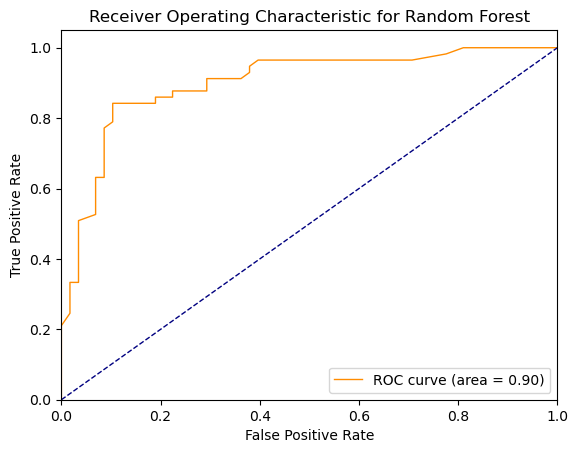

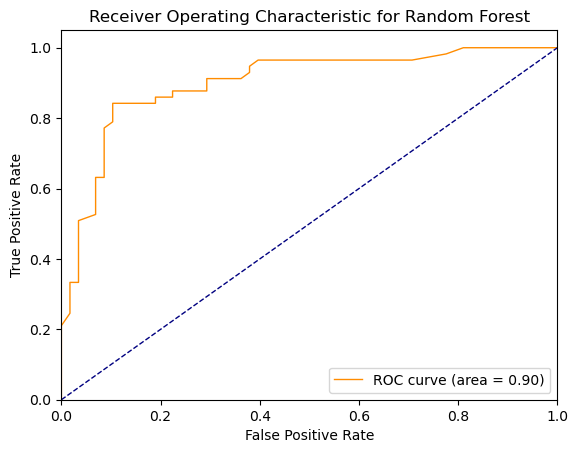

In [12]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
%matplotlib inline

# Fit the Random Forest model to the training data
random_forest_model.fit(X_train, y_train)

# Get the probability scores for the test set
y_probs = random_forest_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area for Random Forest
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Random Forest')
plt.legend(loc="lower right")
plt.show()


In [15]:
from sklearn.metrics import roc_auc_score
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Load the white wine dataset
white_wine_df = pd.read_csv('white_wine.csv')

# Assume that the last column is the target variable and the rest are features
X_white = white_wine_df.iloc[:, :-1]
y_white = white_wine_df.iloc[:, -1]

# Convert target variable to binary {high, low} assuming median split
y_white = (y_white > y_white.median()).astype(int)

# Split the data into training and test sets
X_train_white, X_test_white, y_train_white, y_test_white = train_test_split(X_white, y_white, test_size=0.3, random_state=42)

# Use the previously trained Random Forest model to make predictions on the white wine dataset
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train_white, y_train_white)
y_probs_white = random_forest_model.predict_proba(X_test_white)[:, 1]

# Calculate the AUC score for white wine dataset
auc_score_white = roc_auc_score(y_test_white, y_probs_white)
auc_score_white


TypeError: could not convert string to float: 'low'

In [16]:
# Import necessary modules for model evaluation and Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score

# Create a Random Forest Classifier with default parameters
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the model using red wine data
rf_classifier.fit(X_train, y_train)

# Predict the probabilities of the white wine dataset
y_pred_proba_white = rf_classifier.predict_proba(X_test_white)[:,1]

# Calculate the AUC score
auc_white = roc_auc_score(y_test_white, y_pred_proba_white)

# Predict the classes for white wine dataset
y_pred_white = rf_classifier.predict(X_test_white)

# Calculate the accuracy score
accuracy_white = accuracy_score(y_test_white, y_pred_white)

auc_white, accuracy_white


NameError: name 'X_test_white' is not defined

In [17]:
# Split the white wine data into training and test sets
X_train_white, X_test_white, y_train_white, y_test_white = train_test_split(X_white, y_white, test_size=0.3, random_state=42)

# Predict the probabilities of the white wine dataset using the Random Forest model trained on red wine data
y_pred_proba_white = rf_classifier.predict_proba(X_test_white)[:,1]

# Calculate the AUC score for the white wine dataset
auc_white = roc_auc_score(y_test_white, y_pred_proba_white)

# Predict the classes for white wine dataset
y_pred_white = rf_classifier.predict(X_test_white)

# Calculate the accuracy score for the white wine dataset
accuracy_white = accuracy_score(y_test_white, y_pred_white)

auc_white, accuracy_white


TypeError: Labels in y_true and y_pred should be of the same type. Got y_true=['high' 'low'] and y_pred=[0]. Make sure that the predictions provided by the classifier coincides with the true labels.

In [18]:
# Convert the true labels in y_test_white to integers
label_encoder = LabelEncoder()
y_test_white_encoded = label_encoder.fit_transform(y_test_white)

# Recalculate the accuracy score with the encoded y_test_white
accuracy_white = accuracy_score(y_test_white_encoded, y_pred_white)

# Recalculate the AUC score with the encoded y_test_white
auc_white = roc_auc_score(y_test_white_encoded, y_pred_proba_white)

auc_white, accuracy_white


(0.24074074074074076, 0.75)